**Before you import the following package, make sure to use pip install in your terminal:**

- `pip install numpy`
- `pip install pandas`
- `pip install seaborn`
- `python -m pip install -U pip`
- `python -m pip install -U matplotlib`
- `pip install gower`
- `pip install -U scikit-learn`

In [1]:
# basics
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gower
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score

## Reading CSV and Creating Symptom List

In [2]:
# Read data
df = pd.read_csv("dataset.csv", on_bad_lines = 'skip')
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(4920, 18)

In [4]:
# Create a list of all unique symptoms in the csv.
df_symptoms = df.drop(labels='Disease', axis=1)
df_symptoms.head()

,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
symptom_list = []
for column in df_symptoms.columns:
    symptom_column = df[column].dropna().values
    symptom_values = list(np.unique(symptom_column))
    symptom_list = list(np.unique(symptom_list + symptom_values))

In [6]:
# Number of symptoms
len(symptom_list)

131

In [7]:
# Names of distinct symptoms
symptom_list[:10]

[' abdominal_pain',
 ' abnormal_menstruation',
 ' acidity',
 ' acute_liver_failure',
 ' altered_sensorium',
 ' anxiety',
 ' back_pain',
 ' belly_pain',
 ' blackheads',
 ' bladder_discomfort']

## Symptom Frequency

In [8]:
df_test = df_symptoms.melt(var_name='Column Names', value_name='Symptoms').dropna()
df_test

,Column Names,Symptoms
0,Symptom_1,itching
1,Symptom_1,skin_rash
2,Symptom_1,itching
3,Symptom_1,itching
4,Symptom_1,itching
...,...,...
83461,Symptom_17,muscle_pain
83502,Symptom_17,muscle_pain
83543,Symptom_17,muscle_pain
83584,Symptom_17,muscle_pain


In [9]:
# How frequent each symptom is?
df_frequency = df_test.groupby("Symptoms").agg("count").reset_index().sort_values(by='Column Names', ascending=False)
df_frequency.rename(columns = {'Column Names' : 'Frequency'}, inplace = True)
df_frequency

,Symptoms,Frequency
41,fatigue,1932
120,vomiting,1914
45,high_fever,1362
59,loss_of_appetite,1152
70,nausea,1146
...,...,...
68,muscle_wasting,108
8,blackheads,108
107,sunken_eyes,108
85,pus_filled_pimples,108


In [10]:
# Find the most common symptoms

df_frequency = df_frequency[df_frequency['Frequency'] > 500]

df_frequency.shape

(19, 2)

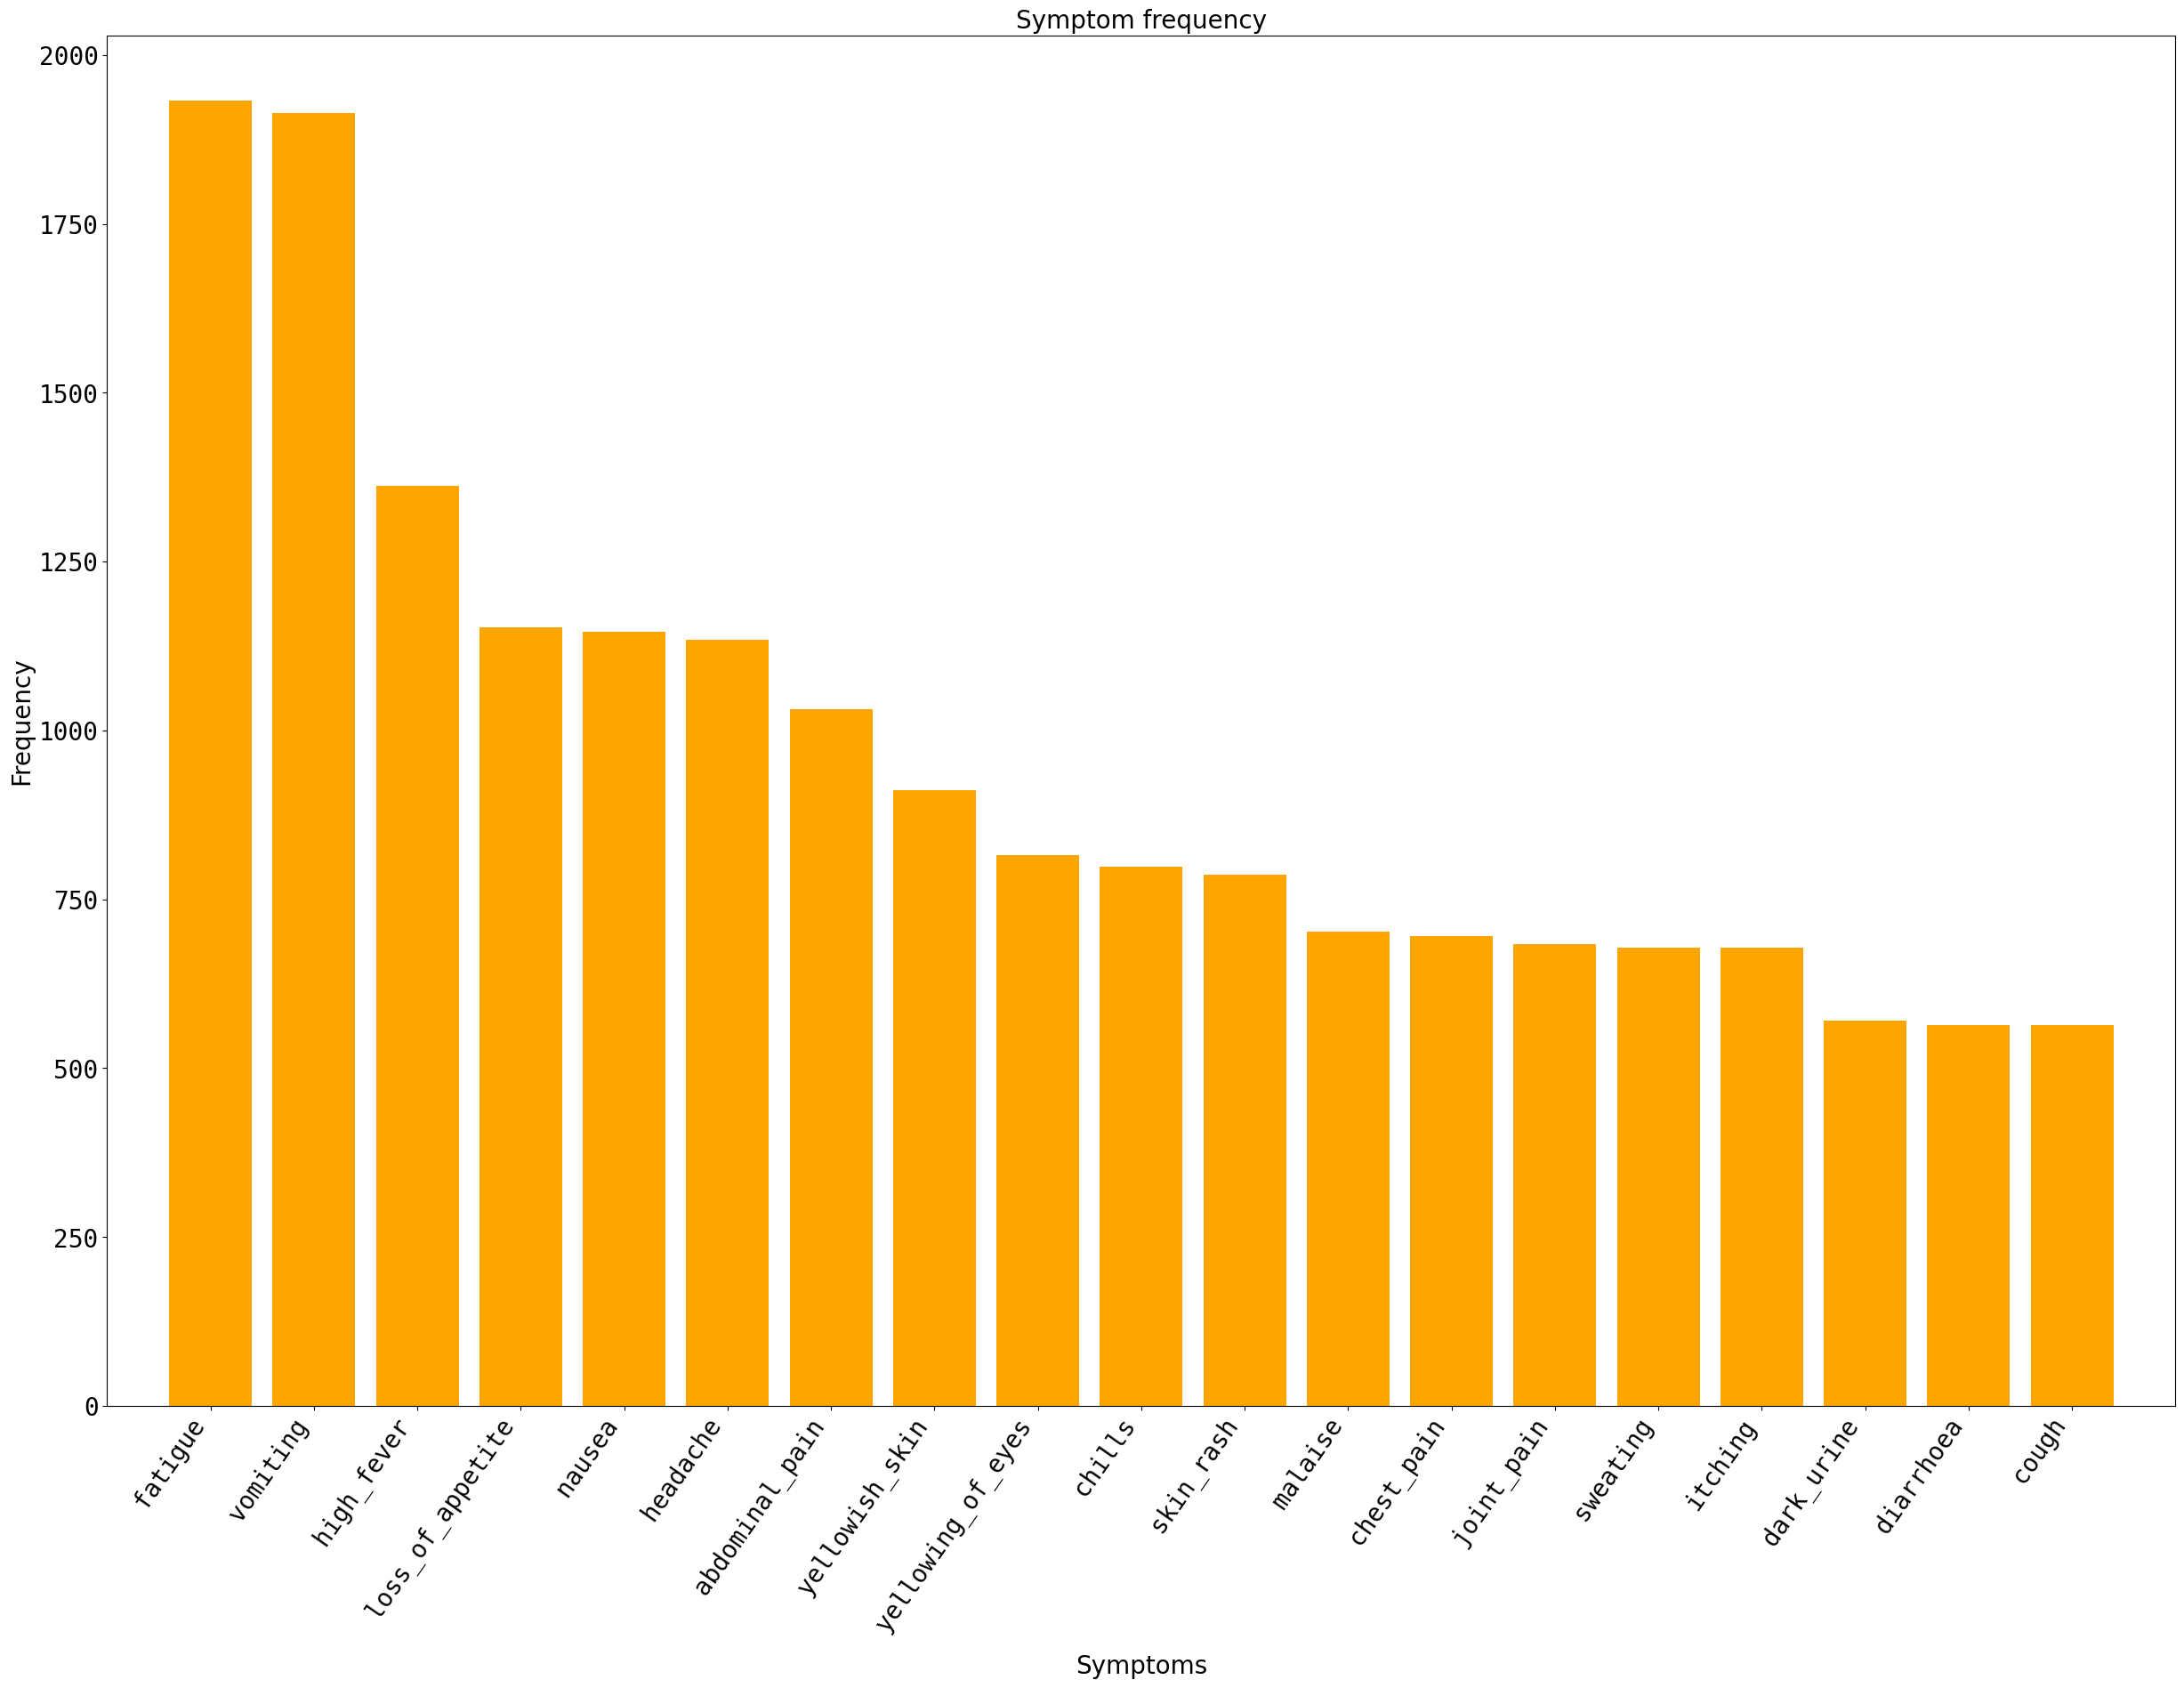

In [11]:
# Data visualization: Symptom frequency
symptom_frequency = df_frequency['Frequency']
symptom = df_frequency['Symptoms']

# Plotting symptom frequency
plt.figure(figsize=(30, 20))
plt.title('Symptom frequency', fontsize=20)
plt.bar(symptom, symptom_frequency, color='orange', align='center')
plt.yticks(fontsize=20, fontname='monospace')
plt.xticks(symptom, ha='right', rotation=55, fontsize=20, fontname='monospace')
plt.xlim([-1, symptom.shape[0]])
plt.xlabel("Symptoms", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.show()

Different method with the same output:

In [12]:
symptom_dict = {}
for i in df_symptoms.columns:
    column_list = df_symptoms[i].dropna().tolist()
    for j in column_list:
        if j in symptom_dict:
            symptom_dict[j] += 1
        else:
            symptom_dict[j] = 1
df_frequency = pd.DataFrame.from_dict(symptom_dict, orient='index', columns=['Frequency'])
df_frequency = df_frequency.sort_values(by='Frequency', ascending=False)
df_frequency
    

,Frequency
fatigue,1932
vomiting,1914
high_fever,1362
loss_of_appetite,1152
nausea,1146
...,...
sunken_eyes,108
weakness_in_limbs,108
swollen_blood_vessels,108
weakness_of_one_body_side,108


In [13]:
symptom_dict

{'itching': 678,
 ' skin_rash': 786,
 ' continuous_sneezing': 222,
 ' shivering': 108,
 ' stomach_pain': 222,
 ' acidity': 222,
 ' vomiting': 1914,
 ' indigestion': 222,
 ' muscle_wasting': 108,
 ' patches_in_throat': 108,
 ' fatigue': 1932,
 ' weight_loss': 456,
 ' sunken_eyes': 108,
 ' cough': 564,
 ' headache': 1134,
 ' chest_pain': 696,
 ' back_pain': 228,
 ' weakness_in_limbs': 108,
 ' chills': 798,
 ' joint_pain': 684,
 ' yellowish_skin': 912,
 ' constipation': 228,
 ' pain_during_bowel_movements': 114,
 ' breathlessness': 450,
 ' cramps': 114,
 ' weight_gain': 114,
 ' mood_swings': 228,
 ' neck_pain': 228,
 ' muscle_weakness': 234,
 ' stiff_neck': 228,
 ' pus_filled_pimples': 108,
 ' burning_micturition': 216,
 ' bladder_discomfort': 114,
 ' high_fever': 1362,
 ' nodal_skin_eruptions': 108,
 ' ulcers_on_tongue': 108,
 ' loss_of_appetite': 1152,
 ' restlessness': 228,
 ' dehydration': 108,
 ' dizziness': 336,
 ' weakness_of_one_body_side': 108,
 ' lethargy': 456,
 ' nausea': 1146

## Data Cleaning

We are trying to replace the column names ("Sympton_1", "Sympton_2"...) into different distinct types of symptons, and also change the value into binary variable (1 or 0). Each row represents a patient, with the disease type and symptoms they're having (0 represents none, 1 represents they do have).

In [14]:
symptom_cols = [f"Symptom_{i}" for i in range(1, 18)]  # Adjust the range to the number of symptom columns you have.
new_df = df.copy()
symptoms = set(val for col in symptom_cols for val in new_df[col])

for symptom in symptoms:
    new_df[symptom] = new_df[symptom_cols].apply(lambda row: 1 if symptom in row.values else 0, axis=1)

new_df.drop(columns=symptom_cols, inplace=True)
new_df


,Disease,NaN,patches_in_throat,red_sore_around_nose,stomach_bleeding,loss_of_smell,back_pain,altered_sensorium,acidity,burning_micturition,...,drying_and_tingling_lips,red_spots_over_body,internal_itching,swollen_legs,bloody_stool,enlarged_thyroid,history_of_alcohol_consumption,small_dents_in_nails,lethargy,loss_of_balance
0,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Fungal infection,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Positional Vertigo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4916,Acne,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4917,Urinary tract infection,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4918,Psoriasis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
# Showcase all the column
pd.set_option('display.max_columns', None)

In [16]:
# Order the column names alphabetically
new_df = new_df.sort_index(axis=1)
new_df.columns = new_df.columns.str.replace(' ', '') 
new_df['abdominal_pain']

0       0
1       0
2       0
3       0
4       0
       ..
4915    0
4916    0
4917    0
4918    0
4919    0
Name: abdominal_pain, Length: 4920, dtype: int64

In [17]:
new_df.shape

(4920, 133)

In [18]:
# Move the Disease column to the first one and delete the NaN column
last_column = new_df.columns[-1]
col_to_move = new_df.columns[130]
new_df = new_df.drop(last_column, axis=1)
new_order = [col_to_move] + [col for col in new_df.columns if col != col_to_move]
new_df = new_df[new_order]
new_df

,Disease,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,blister,blood_in_sputum,bloody_stool,blurred_and_distorted_vision,breathlessness,brittle_nails,bruising,burning_micturition,chest_pain,chills,cold_hands_and_feets,coma,congestion,constipation,continuous_feel_of_urine,continuous_sneezing,cough,cramps,dark_urine,dehydration,depression,diarrhoea,dischromic_patches,distention_of_abdomen,dizziness,drying_and_tingling_lips,enlarged_thyroid,excessive_hunger,extra_marital_contacts,family_history,fast_heart_rate,fatigue,fluid_overload,foul_smell_ofurine,headache,high_fever,hip_joint_pain,history_of_alcohol_consumption,increased_appetite,indigestion,inflammatory_nails,internal_itching,irregular_sugar_level,irritability,irritation_in_anus,joint_pain,knee_pain,lack_of_concentration,lethargy,loss_of_appetite,loss_of_balance,loss_of_smell,malaise,mild_fever,mood_swings,movement_stiffness,mucoid_sputum,muscle_pain,muscle_wasting,muscle_weakness,nausea,neck_pain,nodal_skin_eruptions,obesity,pain_behind_the_eyes,pain_during_bowel_movements,pain_in_anal_region,painful_walking,palpitations,passage_of_gases,patches_in_throat,phlegm,polyuria,prominent_veins_on_calf,puffy_face_and_eyes,pus_filled_pimples,receiving_blood_transfusion,receiving_unsterile_injections,red_sore_around_nose,red_spots_over_body,redness_of_eyes,restlessness,runny_nose,rusty_sputum,scurring,shivering,silver_like_dusting,sinus_pressure,skin_peeling,skin_rash,slurred_speech,small_dents_in_nails,spinning_movements,spotting_urination,stiff_neck,stomach_bleeding,stomach_pain,sunken_eyes,sweating,swelled_lymph_nodes,swelling_joints,swelling_of_stomach,swollen_blood_vessels,swollen_extremeties,swollen_legs,throat_irritation,toxic_look_(typhos),ulcers_on_tongue,unsteadiness,visual_disturbances,vomiting,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,itching
0,Fungal infection,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Fungal infection,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal infection,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Fungal infection,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,Fungal infection,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,(vertigo) Paroymsal Pos

In [19]:
# How many kinds of disease?
new_df['Disease'].value_counts().shape[0]

41

In [20]:
# How many cases in each type of disease?
new_df['Disease'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

## K-Nearest Neighbors

In [21]:
sampled_df = new_df.sample(n=200)
X = sampled_df.drop('Disease', axis=1)
y = sampled_df['Disease']

In [22]:
# Convert integer columns to float
for col in X.select_dtypes(include=['int64']).columns:
    X[col] = X[col].astype('float64')

# Compute the Gower distance matrix
distance_matrix = gower.gower_matrix(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(distance_matrix, y, test_size=0.2, random_state=42)

# You need to recompute the distances for the training and test sets
train_distance_matrix = gower.gower_matrix(X_train, X_train)
test_distance_matrix = gower.gower_matrix(X_test, X_train)


In [24]:
# Create and train the KNN model
knn = KNeighborsClassifier(metric='precomputed')
knn.fit(train_distance_matrix, y_train)

# Make predictions using the test distance matrix
y_pred_knn = knn.predict(test_distance_matrix)

In [25]:
# Output the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn, zero_division=0))

Accuracy: 0.675
                                         precision    recall  f1-score   support

(vertigo) Paroymsal  Positional Vertigo       0.00      0.00      0.00         2
                                   AIDS       0.00      0.00      0.00         0
                                   Acne       1.00      1.00      1.00         1
                    Alcoholic hepatitis       0.00      0.00      0.00         2
                                Allergy       1.00      1.00      1.00         1
                       Bronchial Asthma       0.00      0.00      0.00         1
                   Cervical spondylosis       1.00      1.00      1.00         1
                            Chicken pox       0.50      1.00      0.67         1
                    Chronic cholestasis       0.00      0.00      0.00         0
                            Common Cold       1.00      1.00      1.00         1
                                 Dengue       1.00      1.00      1.00         2
           

## Decision Tree

In [26]:
from sklearn.preprocessing import LabelEncoder

target = new_df[['Disease']]
X = new_df.drop(target, axis=1)
y = target['Disease']

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded = pd.DataFrame(y_encoded, columns=["Disease"])
y_encoded = y_encoded["Disease"]
y_encoded

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: Disease, Length: 4920, dtype: int64

In [27]:
# create train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.20, random_state=42
)

# create validation-train and validation datasets
X_vtrain, X_val, y_vtrain, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42
)

In [28]:
# Establish a parameter grid

param_grid = {
    'max_depth': [10, 30, 50, 70],  # Choose the maximum depth of the tree
    'max_features' : [10, 30, 50, 70], # Choose the number of features to consider when looking for the best split
    'criterion' : ["gini", "entropy", "log_loss"], # Choose the function to measure the quality of a split
    'ccp_alpha': [0.03, 0.05, 0.1]
}

dt_tree = DecisionTreeClassifier(random_state=42)
dt_classifier = GridSearchCV(dt_tree, param_grid, cv=5, verbose=1)
dt_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.03, 0.05, 0.1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 30, 50, 70],
                         'max_features': [10, 30, 50, 70]},
             verbose=1)

In [29]:
print("Best Parameters: ", dt_classifier.best_params_)
best_model = dt_classifier.best_estimator_

# Predict on the test data
dt_y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, dt_y_pred)
print(f'Accuracy: {accuracy}')
# print(classification_report(y_test, dt_y_pred))

Best Parameters:  {'ccp_alpha': 0.03, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 70}
Accuracy: 0.8658536585365854


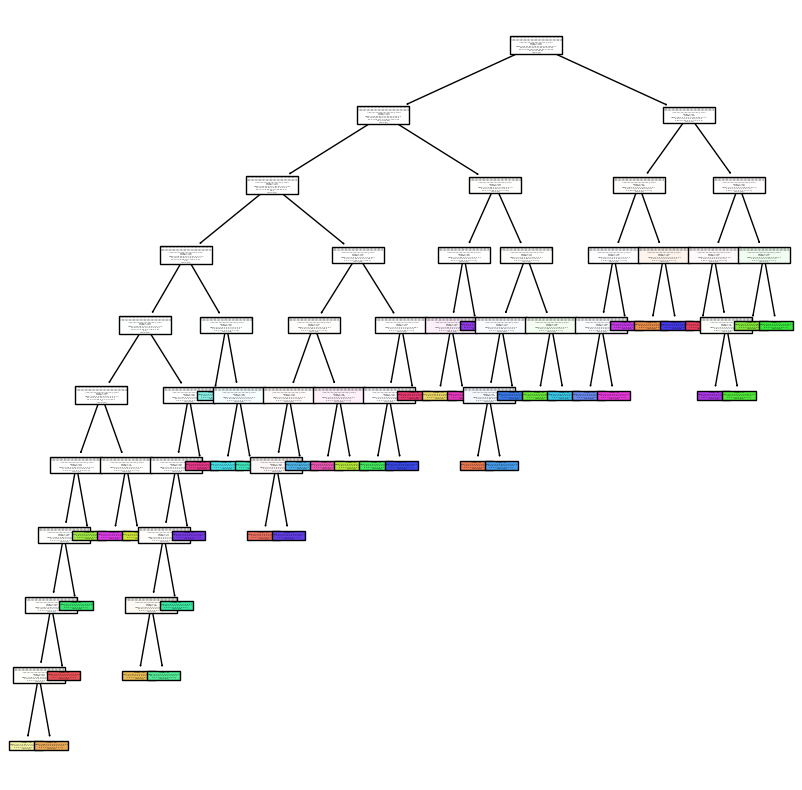

In [30]:
# Visualize the decision tree
plt.figure(figsize=(10, 10))  # More reasonable figure size
plot_tree(best_model, filled=True, feature_names=X_test.to_numpy(), class_names=True)
plt.show()

In [31]:
alpha = [0.0001, 0.001, 0.01, 0.1, 1]

dt_val_rmse = []
for alp in alpha:
    dt = DecisionTreeClassifier(ccp_alpha=0.03, criterion='entropy', max_depth=10, max_features=70)
    dt.fit(X_train, y_train)
    dt_pred = dt.predict(X_val)
    dt_rmse = np.sqrt(mean_squared_error(y_val, dt_pred))
    dt_val_rmse.append(dt_rmse)
dt_best = alpha[np.argmin(dt_val_rmse)]


print("Decision Tree Classifier RMSE: ", dt_val_rmse)
print("Decision Tree Classifier best alpha parameter: ", dt_best)

Decision Tree Classifier RMSE:  [5.33830140858813, 5.019378690291083, 5.422504338356253, 5.487757486761103, 6.184042835136415]
Decision Tree Classifier best alpha parameter:  0.001


## Random Forest

In [32]:
param_grid = {
    'max_depth': [1, 2, 3, 4, 5],  # Choose the maximum depth of the tree
    'max_features' : [10, 15, 20], # Choose the number of features to consider when looking for the best split
    'criterion' : ["gini", "entropy", "log_loss"], # Choose the function to measure the quality of a split
    'ccp_alpha': [0.03, 0.05, 0.1], # Choose the complexity parameter used for Minimal Cost-Complexity Pruning
    'n_estimators': [5, 6, 7] # Choose the number of trees in the forest
}

rf_classifier = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1)
rf_classifier.fit(X_train, y_train)

print("Best Parameters: ", rf_classifier.best_params_)

# Predict on the test set
rf_y_pred = rf_classifier.predict(X_test)

# Decode the disease type back to strings
y_pred_labels = encoder.inverse_transform(rf_y_pred)
y_pred_labels[:10]

# Evaluate the model
accuracy = accuracy_score(y_test, rf_y_pred)
class_report = classification_report(y_test, rf_y_pred, zero_division=0)

# Output the model's performance
print("Accuracy:", accuracy)
print("Classification Report:\n", class_report)

Fitting 5 folds for each of 405 candidates, totalling 2025 fits
Best Parameters:  {'ccp_alpha': 0.03, 'criterion': 'log_loss', 'max_depth': 5, 'max_features': 20, 'n_estimators': 7}
Accuracy: 0.8953252032520326
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91        18
           1       0.88      0.93      0.90        30
           2       0.73      0.92      0.81        24
           3       1.00      0.96      0.98        25
           4       1.00      0.88      0.93        24
           5       1.00      1.00      1.00        23
           6       1.00      0.82      0.90        33
           7       0.92      1.00      0.96        23
           8       1.00      1.00      1.00        21
           9       1.00      1.00      1.00        15
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        26
          12       1.00      0.95      0.98        21
        

In [33]:
rf_val_rmse = []
for alp in alpha:
    rf = RandomForestClassifier(ccp_alpha = 0.05, criterion = 'log_loss', max_depth = 5, max_features = 10, n_estimators = 5)
    rf.fit(X_train, y_train)
    rf_pred = rf.predict(X_val)
    rf_rmse = np.sqrt(mean_squared_error(y_val, rf_pred))
    rf_val_rmse.append(rf_rmse)
rf_best = alpha[np.argmin(rf_val_rmse)]


print("Random Forest Classifier RMSE: ", rf_val_rmse)
print("Random Forest Classifier best alpha parameter: ", rf_best)

Random Forest Classifier RMSE:  [12.962607292410693, 10.932534224438903, 10.641480947277453, 9.78506320515785, 8.64712915594499]
Random Forest Classifier best alpha parameter:  1


In [34]:
# Using RandomForestClassifier to train the model
rf_classifier = RandomForestClassifier(ccp_alpha = 0.05, criterion = 'log_loss', max_depth = 5, max_features = 10, n_estimators = 5)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

### 1st Data visualization: Feature Importance

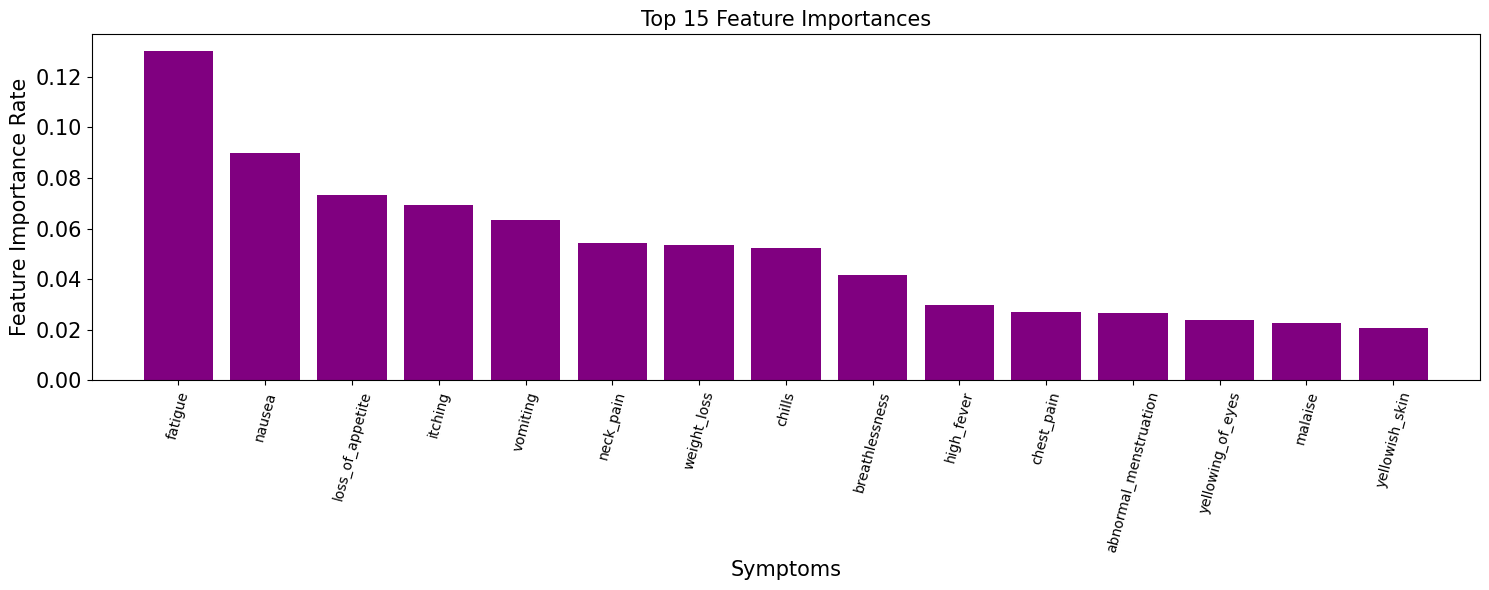

In [35]:
# Data visualization: Feature Importance
feature_importance = rf_classifier.feature_importances_
# Matching feature names with their importance scores
features = X_train.columns
indices = np.argsort(feature_importance)[::-1]

# Selecting the top 15 features
top_10_indices = indices[:15]

# Plotting the top 10 feature importances
plt.figure(figsize=(15, 6))  # Adjust the figure size as needed
plt.title('Top 15 Feature Importances', fontsize=15)
plt.bar(range(15), feature_importance[top_10_indices], color='purple', align='center')
plt.yticks(fontsize=15)
plt.xticks(range(15), [features[i] for i in top_10_indices], rotation = 75, fontsize=10)
plt.xlim([-1, 15])
plt.xlabel("Symptoms", fontsize=15)
plt.ylabel("Feature Importance Rate", fontsize=15)
plt.tight_layout()
plt.show()

### 2nd Data visualization: Heatmap (Disease and Symptoms Association Rate)

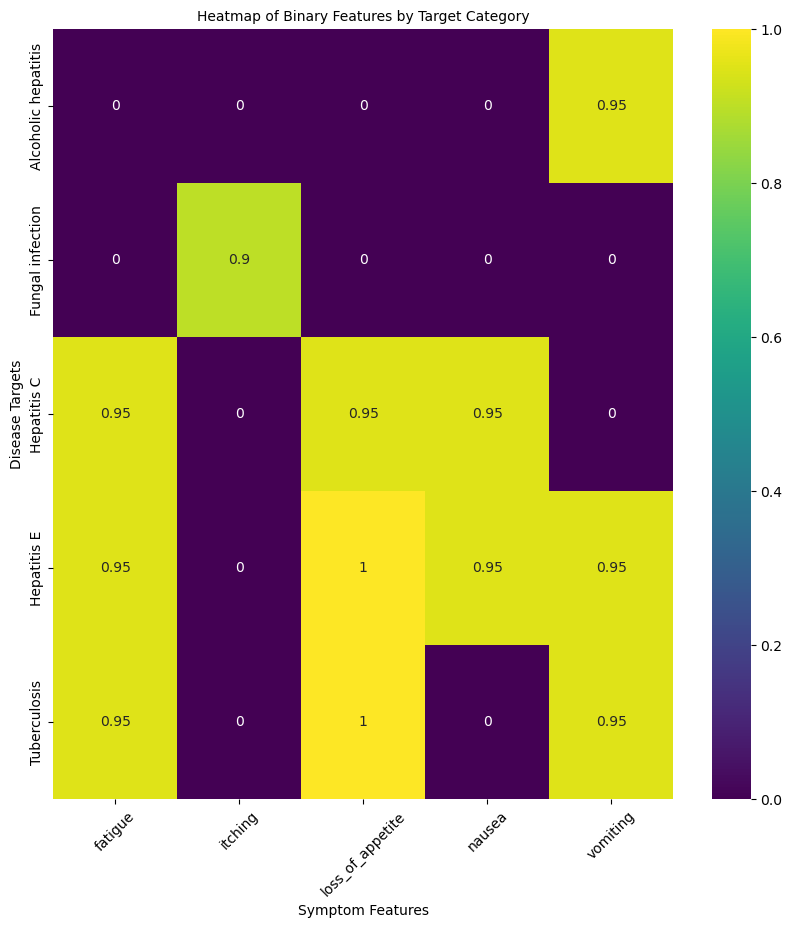

In [36]:
# Select the top N features
top_n_indices = indices[:5]
top_n_features = X.columns[top_n_indices]

# Filter the DataFrame to include only the top N features along with the 'Disease' column
filtered_df = new_df[top_n_features.tolist() + ['Disease']]

# Determine the top 5 diseases by frequency
top_5_diseases = filtered_df['Disease'].value_counts().head(5).index

# Filter the DataFrame to include only the top 5 diseases
filtered_df_top_diseases = filtered_df[filtered_df['Disease'].isin(top_5_diseases)]

# Create a pivot table for the heatmap
pivot_table = pd.pivot_table(filtered_df_top_diseases, index='Disease', aggfunc=np.mean)

# Create the heatmap
plt.figure(figsize=(10, 10))
ax = sns.heatmap(pivot_table, annot=True, cmap='viridis')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10, rotation=45)
plt.title('Heatmap of Binary Features by Target Category', fontsize=10)
ax.set_xlabel('Symptom Features', fontsize=10)  # Custom X-axis title
ax.set_ylabel('Disease Targets', fontsize=10)  # Custom Y-axis title
plt.show()